In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
import switch_metrics as sm
sys.path.append('/mnt/home/szheng/projects/util_code/hpc')
import get_ripple_time_participation_cofiring as grtpc
reload(grtpc)

<module 'get_ripple_time_participation_cofiring' from '/mnt/home/szheng/projects/util_code/hpc/get_ripple_time_participation_cofiring.py'>

In [46]:
# data_dir_full = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)['data_dir_full'][0] 
data_dir_full = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)['data_dir_full'][4] 

In [47]:
data_dir_full

'/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120'

In [48]:
reload(sm)

<module 'switch_metrics' from '/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py'>

In [49]:
res = sm.add_switch_metrics_wrapper(data_dir_full,
                        dosave=False, save_dir='switch_analysis',save_fn='all_switch_info.p',
                        force_reload=False,
                        load_only=True)
plt.close()
spk_beh_df=res['spk_beh_df']
cell_cols_d=res['cell_cols_d']
fr_map_trial_df_d=res['fr_map_trial_df_d']
all_sw_info=res['all_sw_info']
pf_all_field_combined = res['pf_all_field_combined']
changes_df_combined = res['changes_df_combined']

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/switch_analysis/all_switch_info.p exists; loading---


In [79]:
data_dir_full

'/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120'

In [60]:
mergepoints['timestamps']

array([[    0.        ,  9594.39996667],
       [ 9594.4       , 11968.76796667],
       [11968.768     , 17992.73596667],
       [17992.736     , 19809.31196667],
       [19809.312     , 26116.09596667],
       [26116.096     , 27244.41596667]])

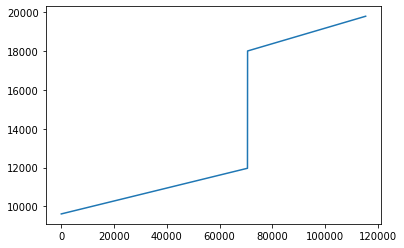

In [77]:
plt.plot(behavior['timestamps'])

In [74]:
# load data
mat_to_return=prep.load_stuff(data_dir_full)
# sessionPulses=mat_to_return['sessionPulses']
# filtered = mat_to_return['filtered']
behavior=mat_to_return['behavior']
ripples = mat_to_return['ripples']
cell_metrics=mat_to_return['cell_metrics']
mergepoints = mat_to_return['mergepoints']


prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=False,extra_load={})
spk_beh_df=prep_res['spk_beh_df']
cell_cols_d = prep_res['cell_cols_d']
# beh_df = prep_res['beh_df'].as_dataframe()
# beh_df_d,beh_df=dpp.group_into_trialtype(beh_df)
# spike_trains = prep_res['spike_trains']


KeyboardInterrupt



In [51]:
%%time
import pairwise_analysis as pwa
reload(pwa)
ripple_sim_d = pwa.get_all_ripple_pairwise_sim(cell_metrics,ripples,mergepoints)

CPU times: user 18.4 s, sys: 83.3 ms, total: 18.5 s
Wall time: 18.5 s


In [52]:
reload(pwa)
beh_corr_all = pwa.get_beh_corr(spk_beh_df,cell_cols=None,window=3,window_size=0.1,speed_key='v',speed_thresh=1.)




In [53]:
reload(pwa)
sw_sim_allonoff, time_diff_allonoff=pwa.get_sw_sim(all_sw_info,win_l=[1,10,30,60],decay_rate_l=[0.003,0.007,0.01,0.05,0.1])



In [54]:
nrepeats=1000
task_ind=0

test_res = cpacas.sweep_test_coswitch_wrapper(data_dir_full,
                                pf_res_save_fn='place_field_avg_and_trial_vthresh.p',
                                pf_shuffle_fn = 'fr_map_null_trialtype_vthresh.p',
                                speed_key='v',fr_key='fr_peak',
                                bin_size=2.2,
                                switch_res_query=(slice(None),0.3,'switch_magnitude',0.4),
                                nrepeats_sw = nrepeats,
                                edges = None,
                                save_fn = 'switch_res_window.p',
                                load_only=True,
                                dosave=False,force_reload=False,
                                task_ind = task_ind,
                                prep_force_reload=False,
                                )



changes_df_combined_d=test_res['changes_df_combined_d']
index_within_to_trial_index_df = dpp.index_within_to_trial_index(spk_beh_df)
pos_to_time_func_per_trial = test_res['pos_to_time_func_per_trial']
pf_loc_combined = test_res['pf_loc_combined']
all_sw_times_v_combined_shuffle_l = test_res['all_sw_times_v_combined_shuffle_l']

# all_sw_times_v_combined_shuffle_l = cpacas.shuffle_changes_df_combined_get_sw_times_v_combined_shuffle(changes_df_combined_d,index_within_to_trial_index_df,pos_to_time_func_per_trial,pf_loc_combined,nrepeats=nrepeats,task_ind=task_ind)



/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/switch_analysis/switch_res_window.p exists; loading---


# shuffle test

In [55]:
%%time
sw_sim_allonoff_shuffle = []
for ii,allsw in enumerate(all_sw_times_v_combined_shuffle_l):
    ss, td=pwa.get_sw_sim(allsw,win_l=[1,30,60],decay_rate_l=[])
#     sw_sim_allonoff_shuffle[ii]=sw_sim_allonoff
    sw_sim_allonoff_shuffle.append(ss)


CPU times: user 1min 4s, sys: 570 ms, total: 1min 4s
Wall time: 1min 4s


In [56]:
def label_difference_grouped_by_coswitch(label_sim_one,co_sw_sim_one):
    label_sim_one = label_sim_one.dropna(axis=0,how='all').dropna(axis=1,how='all')
    co_sw_sim_one = co_sw_sim_one.dropna(axis=0,how='all').dropna(axis=1,how='all')
    c1 = label_sim_one.index
    c2 = co_sw_sim_one.index
    common_ind = c1.intersection(c2)
    label=label_sim_one.loc[common_ind,common_ind].values
    cosw=co_sw_sim_one.loc[common_ind,common_ind].values
    label_flatten=np.ravel(label[np.triu_indices_from(label,1)])
    cosw_flatten=np.ravel(cosw[np.triu_indices_from(cosw,1)])
    diff = np.mean(label_flatten[cosw_flatten==1]) - np.mean(label_flatten[cosw_flatten==0])
#     diff = scipy.stats.pearsonr(label_flatten,cosw_flatten)[0]
    return diff, label_flatten, cosw_flatten
    
    
    

In [72]:
# epoch = 2
# label_sim_one = ripple_sim_d.loc['ripple_only','count_in_interval',epoch]
# onoff = 1
# sw_key='within_1'
# co_sw_sim_one = sw_sim_allonoff.loc[onoff,sw_key]
# # data
# diff_data,label_flatten,cosw_flatten = label_difference_grouped_by_coswitch(label_sim_one,co_sw_sim_one)
# # shuffle
# diff_data_sh_l = []
# for ss in sw_sim_allonoff_shuffle:
#     cosw_shuffle_one=ss.loc[onoff,sw_key]
#     diff_data_sh,label_flatten,cosw_flatten_sh=label_difference_grouped_by_coswitch(label_sim_one,cosw_shuffle_one)
#     diff_data_sh_l.append(diff_data_sh)

/tmp/ipykernel_156478/122050453.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  label_sim_one = ripple_sim_d.loc['ripple_only','count_in_interval',epoch]
/tmp/ipykernel_156478/122050453.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  co_sw_sim_one = sw_sim_allonoff.loc[onoff,sw_key]
/tmp/ipykernel_156478/122050453.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  cosw_shuffle_one=ss.loc[onoff,sw_key]


In [57]:
# shuffle
def shuffle_test_label_switch_diff_plot(label_sim_one,co_sw_sim_one,sw_sim_allonoff_shuffle,onoff=1,sw_key='within_1',
                                        fig=None,ax=None,doplot=False
                                       ):
    diff_data,label_flatten,cosw_flatten = label_difference_grouped_by_coswitch(label_sim_one,co_sw_sim_one)
    diff_data_sh_l = []
    for ss in sw_sim_allonoff_shuffle:
        cosw_shuffle_one=ss.loc[onoff,sw_key]
        diff_data_sh,label_flatten,cosw_flatten_sh=label_difference_grouped_by_coswitch(label_sim_one,cosw_shuffle_one)
        diff_data_sh_l.append(diff_data_sh)
    diff_data_sh_l = np.array(diff_data_sh_l)
    pval = 1-(diff_data > diff_data_sh_l).mean()
    to_return = [diff_data,diff_data_sh_l, pval]
    if doplot:
        fig,ax=ph.plot_shuffle_data_dist_with_thresh(diff_data_sh_l,diff_data,fig=fig,ax=ax)
        to_return.extend([fig,ax])
    return tuple(to_return)
        


In [82]:
mergepoints.timestamps

array([[    0.        ,  9594.39996667],
       [ 9594.4       , 11968.76796667],
       [11968.768     , 17992.73596667],
       [17992.736     , 19809.31196667],
       [19809.312     , 26116.09596667],
       [26116.096     , 27244.41596667]])

In [87]:
mergepoints['timestamps'].shape[0]

6

<IPython.core.display.Javascript object>


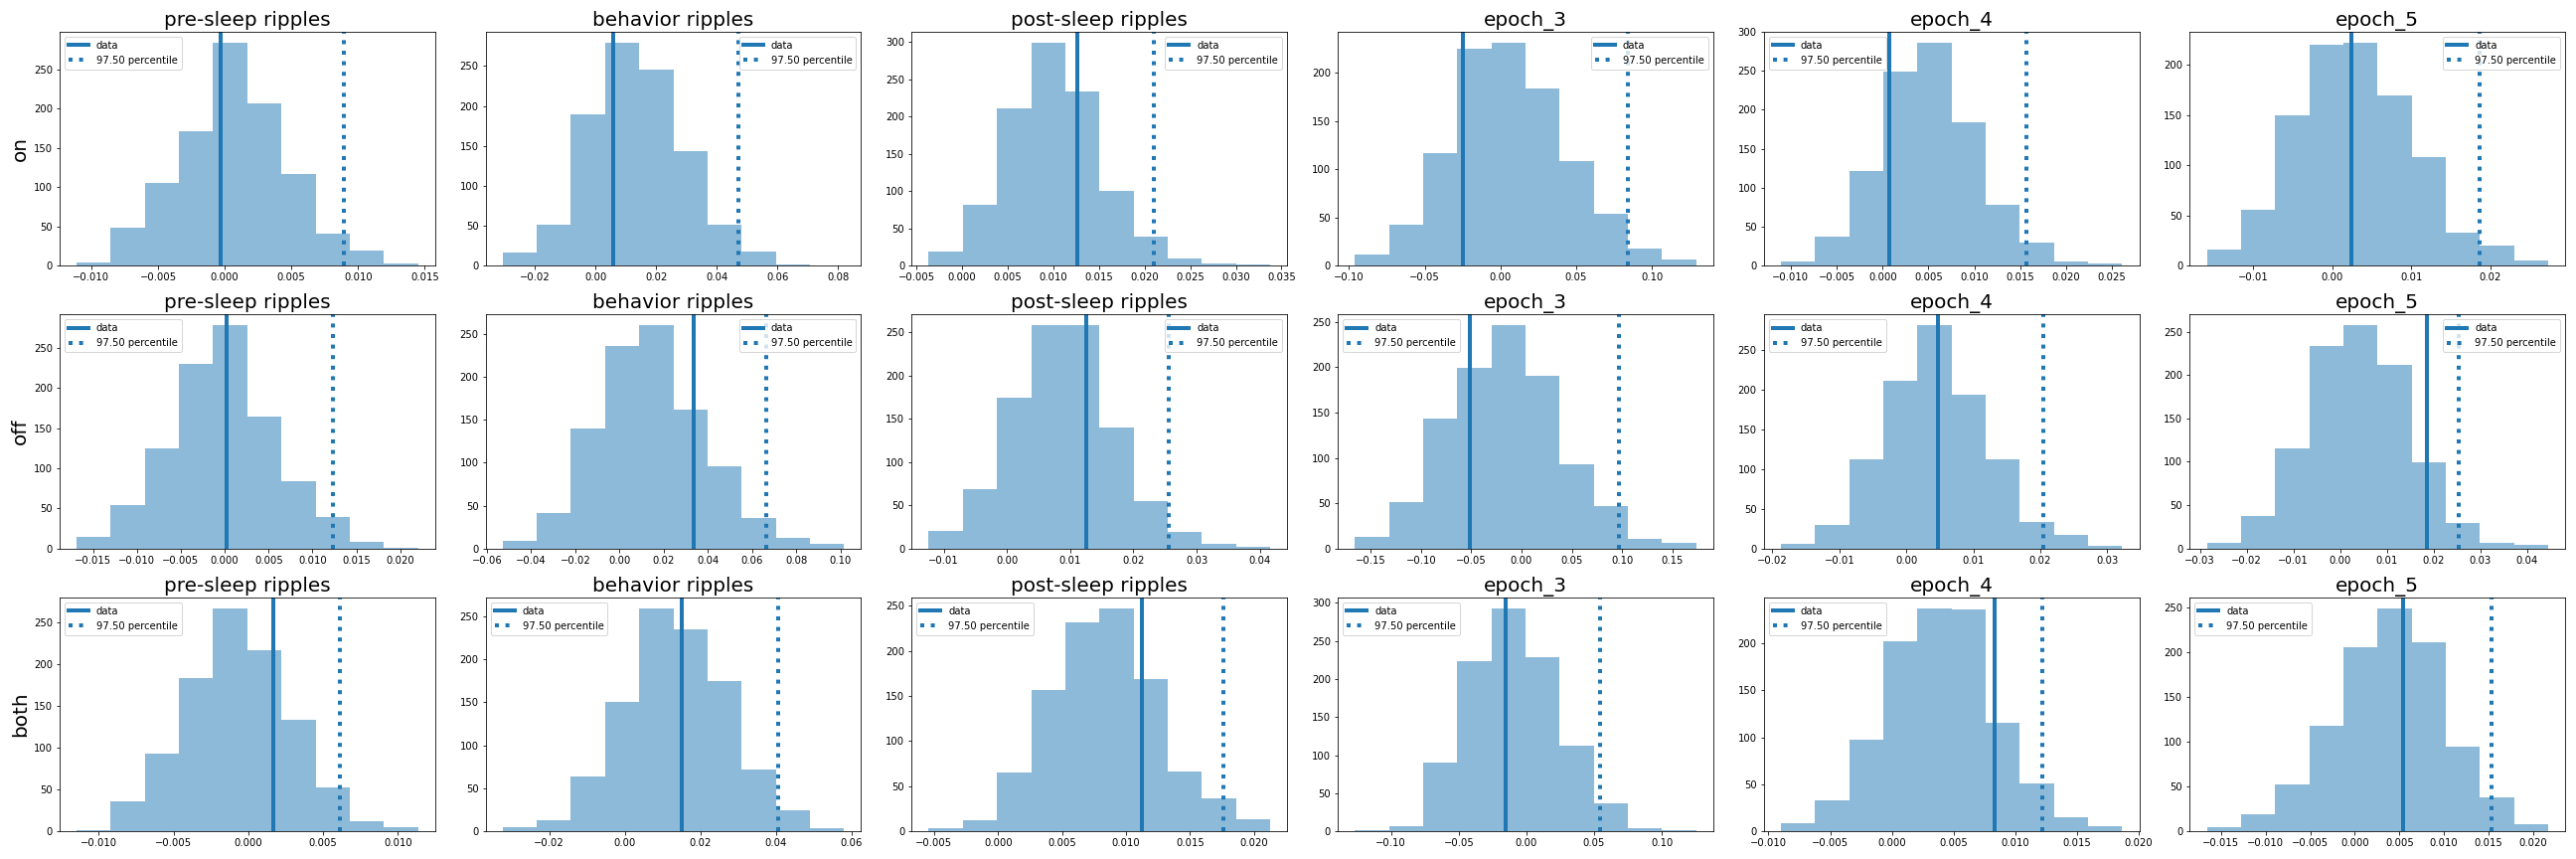

/tmp/ipykernel_538552/2121665662.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  label_sim_one = ripple_sim_d.loc['ripple_only','count_in_interval',epoch]
/tmp/ipykernel_538552/2121665662.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  co_sw_sim_one = sw_sim_allonoff.loc[onoff,sw_key]


In [90]:
%matplotlib notebook
onoff=1
onoff_str_d = {1:'on',-1:'off','both':'both'}
sw_key='within_1'

nplots = mergepoints['timestamps'].shape[0]
fig,axs = plt.subplots(3,nplots,figsize=(6*nplots,4*3))
for ii,onoff in enumerate([1,-1,'both']):
    onoff_str=onoff_str_d[onoff]
    epoch_name = ['pre-sleep ripples','behavior ripples','post-sleep ripples']
#     for jj,epoch in enumerate([0,1,2]):
    for jj,epoch in enumerate(range(nplots)):
        label_sim_one = ripple_sim_d.loc['ripple_only','count_in_interval',epoch]
        co_sw_sim_one = sw_sim_allonoff.loc[onoff,sw_key]
    
        ax=axs[ii,jj]
        diff_data,diff_data_sh_l,pval,fig,ax=shuffle_test_label_switch_diff_plot(label_sim_one,co_sw_sim_one,sw_sim_allonoff_shuffle,onoff=onoff,sw_key=sw_key,
                                            fig=fig,ax=ax,doplot=True
                                           )
        if jj <=len(epoch_name)-1:
            title = epoch_name[jj]
        else:
            title = f"epoch_{jj}"
        ax.set_title(title)
        if jj==0:
            ax.set_ylabel(onoff_str)
plt.tight_layout()


In [91]:
same_birth =(cell_metrics.optoTag.p_salt < 0.001) & (cell_metrics.optoTag.h_reliable)
same_birth_mat = same_birth[:,None].dot(same_birth[None,:])
same_birth_df = pd.DataFrame(same_birth_mat.astype(int),columns=cell_cols_d['all'],index=cell_cols_d['all'])

<IPython.core.display.Javascript object>


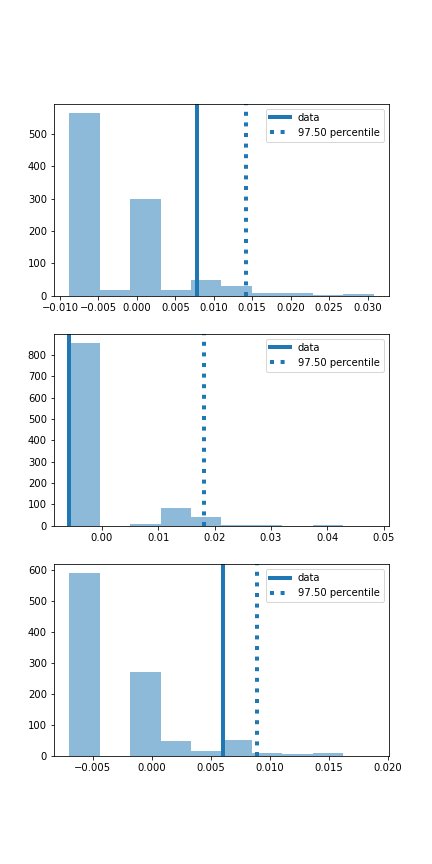

/tmp/ipykernel_538552/1875622277.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  co_sw_sim_one = sw_sim_allonoff.loc[onoff,sw_key]


In [92]:
label_sim_one = same_birth_df
fig,axs = plt.subplots(3,1,figsize=(6*1,4*3))
for ii,onoff in enumerate([1,-1,'both']):
    ax=axs[ii]
    co_sw_sim_one = sw_sim_allonoff.loc[onoff,sw_key]
    diff_data,diff_data_sh_l,pval,fig,ax=shuffle_test_label_switch_diff_plot(label_sim_one,co_sw_sim_one,sw_sim_allonoff_shuffle,onoff=onoff,sw_key=sw_key,
                                    fig=fig,ax=ax,doplot=True
                                   )

In [95]:
pf_overlap = pwa.get_field_overlap_pair(pf_all_field_combined)

/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,1] = np.tile(uid[None,:],[n_field,1])


(array([15358.,  1422.,  1610.,  1584.,  2232.,  3300.,  3378.,  3230.,
         3544.,  2758.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

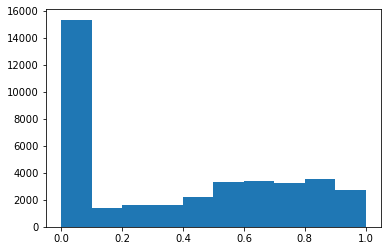

In [98]:
%matplotlib inline
plt.hist(pf_overlap.values.flatten())

In [100]:
pf_overlap_binary = pf_overlap > 0.5

In [101]:
onoff=1
sw_key='within_1'
co_sw_sim_one = sw_sim_allonoff.loc[onoff,sw_key]

/tmp/ipykernel_538552/3531243109.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  co_sw_sim_one = sw_sim_allonoff.loc[onoff,sw_key]


In [102]:
co_sw_sim_one = co_sw_sim_one.dropna(axis=0,how='all').dropna(axis=1,how='all')

In [103]:
common_inds=co_sw_sim_one.columns.intersection(pf_overlap_binary.columns)

In [104]:
co_sw_sim_one_sub=co_sw_sim_one.loc[common_inds,common_inds]
pf_overlap_binary_sub = pf_overlap_binary.loc[common_inds,common_inds]

In [105]:
pf_overlap_and_cosw = pf_overlap_binary_sub & co_sw_sim_one_sub
pf_overlap_and_not_cosw = pf_overlap_binary_sub & np.logical_not(co_sw_sim_one_sub)

In [106]:
pf_not_overlap_binary_sub = np.logical_not(pf_overlap_binary_sub)

In [107]:
label_sim_one = label_sim_one = ripple_sim_d.loc['ripple_only','count_in_interval',2]
diff,label_sim_flatten,pf_overlap_and_cosw_flatten = label_difference_grouped_by_coswitch(label_sim_one,pf_overlap_and_cosw)

/tmp/ipykernel_538552/4156438352.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  label_sim_one = label_sim_one = ripple_sim_d.loc['ripple_only','count_in_interval',2]


In [108]:
diff,label_sim_flatten,pf_overlap_and_not_cosw_flatten=label_difference_grouped_by_coswitch(label_sim_one,pf_overlap_and_not_cosw)

diff,label_sim_flatten,pf_not_overlap_binary_sub_flatten=label_difference_grouped_by_coswitch(label_sim_one,pf_not_overlap_binary_sub)





In [109]:
label_sim_not_cosw = pd.DataFrame(label_sim_flatten[pf_overlap_and_not_cosw_flatten],columns=['value'])
label_sim_not_cosw['category'] = 'pf overlap + no coswitch'


label_sim_cosw = pd.DataFrame(label_sim_flatten[pf_overlap_and_cosw_flatten],columns=['value'])
label_sim_cosw['category'] = 'pf overlap + coswitch'


label_sim_nooverlap = pd.DataFrame(label_sim_flatten[pf_not_overlap_binary_sub_flatten],columns=['value'])
label_sim_nooverlap['category'] = 'pf low overlap'



In [110]:
label_sim_categoried = pd.concat([label_sim_nooverlap,label_sim_not_cosw,label_sim_cosw],axis=0)

In [171]:
scipy.stats.ttest_ind(label_sim_cosw['value'],label_sim_not_cosw['value'])

Ttest_indResult(statistic=-8.038006611813667, pvalue=9.936503631028972e-16)

In [174]:
scipy.stats.ttest_ind(label_sim_nooverlap['value'],label_sim_not_cosw['value'])

Ttest_indResult(statistic=-31.495722993524915, pvalue=4.811979673565279e-214)

[Text(0, 0.5, 'ripple firing correlation')]

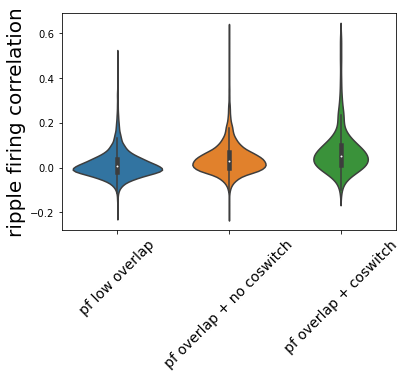

In [173]:
%matplotlib inline
ax=sns.violinplot(data=label_sim_categoried,x='category',y='value')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14,rotation=45)
ax.set(xlabel='')
ax.set(ylabel='ripple firing correlation')

In [ ]:
from scipy.spatial.distance import pdist,squareform

In [200]:
exc_con = cell_metrics['putativeConnections']['excitatory'].astype(int)

ncells = len(cell_cols_d['all'])
con_mat = np.zeros((ncells,ncells))
for i in exc_con:
    ind_0 = i-1
    con_mat[ind_0[0],ind_0[1]] =1
con_df=pd.DataFrame(con_mat,columns=cell_cols_d['all'],index=cell_cols_d['all'])

con_int_pyr = con_df.loc[cell_cols_d['pyr'],cell_cols_d['int']].T

dist_flat=pdist(con_int_pyr.T,metric='dice')

dist_flat[np.isnan(dist_flat)]=1.

In [287]:
# one way: dice similarity
dist_flat=pdist(con_int_pyr.T,metric='dice')
dist_flat[np.isnan(dist_flat)]=1.
dist_mat=squareform(dist_flat)
con_sim_mat = 1 - dist_mat
con_sim_df = pd.DataFrame(con_sim_mat,index=cell_cols_d['pyr'],columns=cell_cols_d['pyr'])

In [298]:
# another way: binary shared interneuron....
con_sim_df = (con_int_pyr.T.dot(con_int_pyr) > 0).astype(int)

(array([ 41909.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 136175.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

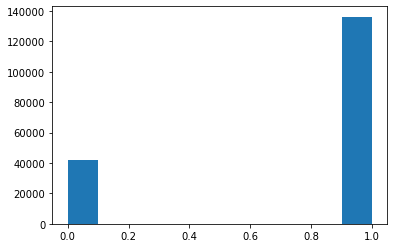

In [299]:
plt.hist(con_sim_df.values.flatten())

/tmp/ipykernel_156478/3521031969.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  co_sw_sim_one = sw_sim_allonoff.loc[onoff,sw_key]
/tmp/ipykernel_156478/4032750720.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  cosw_shuffle_one=ss.loc[onoff,sw_key]


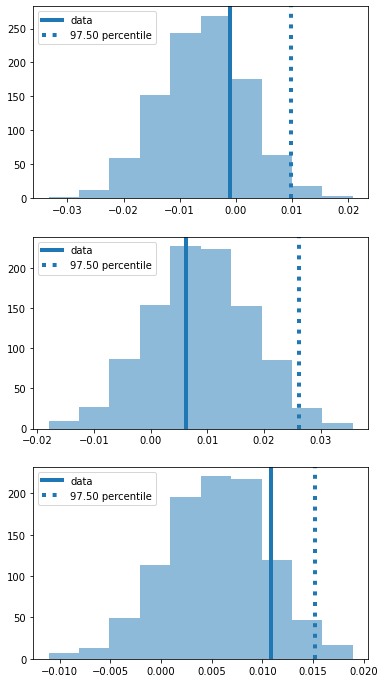

In [302]:
label_sim_one = con_sim_df
fig,axs = plt.subplots(3,1,figsize=(6*1,4*3))
sw_key = 'within_30'
for ii,onoff in enumerate([1,-1,'both']):
    ax=axs[ii]
    co_sw_sim_one = sw_sim_allonoff.loc[onoff,sw_key]
    diff_data,diff_data_sh_l,pval,fig,ax=shuffle_test_label_switch_diff_plot(label_sim_one,co_sw_sim_one,sw_sim_allonoff_shuffle,onoff=onoff,sw_key=sw_key,
                                    fig=fig,ax=ax,doplot=True
                                   )

In [ ]:
label_sim_one = ripple_sim_d.loc['ripple_only','count_in_interval',epoch]

In [114]:
# shuffle pf all field
index=pf_all_field_combined.index
columns = pf_all_field_combined.columns
n_shuffle = 100
pf_all_field_combined_sh_l = []
pf_overlap_sh_l = []
for i in range(n_shuffle):
    pf_all_field_combined_sh = pd.DataFrame(pf_all_field_combined.sample(frac=1).values,index=index,columns=columns)
    pf_all_field_combined_sh_l.append(pf_all_field_combined_sh)
    pf_overlap_sh = pwa.get_field_overlap_pair(pf_all_field_combined_sh)
    pf_overlap_sh_l.append(pf_overlap_sh)

/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,1] = np.tile(uid[None,:],[n_field,1])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for

/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,1] = np.tile(uid[None,:],[n_field,1])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for

/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,1] = np.tile(uid[None,:],[n_field,1])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for

/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,1] = np.tile(uid[None,:],[n_field,1])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for

/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,1] = np.tile(uid[None,:],[n_field,1])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for

/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,1] = np.tile(uid[None,:],[n_field,1])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for

/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,1] = np.tile(uid[None,:],[n_field,1])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for

/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,1] = np.tile(uid[None,:],[n_field,1])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for

In [115]:
pf_overlap_sh_binary_l = [(x>0.5).astype(int) for x in pf_overlap_sh_l]

In [116]:
pf_overlap = pwa.get_field_overlap_pair(pf_all_field_combined)
pf_overlap_binary = (pf_overlap > 0.5).astype(int)

/mnt/home/szheng/projects/util_code/pairwise_analysis.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:110: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,1] = np.tile(uid[None,:],[n_field,1])


In [318]:
epoch_name

['pre-sleep ripples', 'behavior ripples', 'post-sleep ripples']

/tmp/ipykernel_156478/2398978934.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  label_sim_one = ripple_sim_d.loc['ripple_only','count_in_interval',epoch]


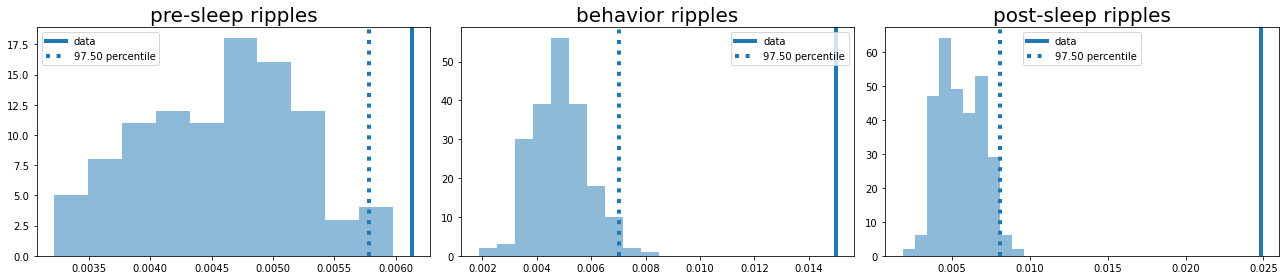

In [319]:
diff_shuffle_l = []
fig,axs=plt.subplots(1,3,figsize=(6*3,4))
for ii,epoch in enumerate([0,1,2]):
    ax=axs[ii]
    label_sim_one = ripple_sim_d.loc['ripple_only','count_in_interval',epoch]
    diff_data,_,_=label_difference_grouped_by_coswitch(label_sim_one,pf_overlap_binary)
    for pfosh in pf_overlap_sh_binary_l:
        diff_sh,_,_=label_difference_grouped_by_coswitch(label_sim_one,pfosh)
        diff_shuffle_l.append(diff_sh)
    fig,ax = ph.plot_shuffle_data_dist_with_thresh(diff_shuffle_l,diff_data,fig=fig,ax=ax)
    ax.set_title(epoch_name[ii])
plt.tight_layout()